# Limitation of Train_Test_split

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
form sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
iris=load_iris()
X = iris.data
y = iris.target
X_train , X_test , y_train , y_test=train_test_split(X , y , random_state = 4)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train , y_train)
y_pred=knn.predict(X_test)
knn_pred=metrics.accuracy_score(y_test , y_pred)
print(knn_pred)

0.9736842105263158


# Change the random state value(which is changing the observation to be the testing set)

In [9]:
iris=load_iris()
X = iris.data
y = iris.target
X_train , X_test , y_train , y_test=train_test_split(X , y , random_state = 3)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train , y_train)
y_pred=knn.predict(X_test)
knn_pred=metrics.accuracy_score(y_test , y_pred)
print(knn_pred)

0.9473684210526315


In [11]:
# As we change the random_state , the testing accuracy will change
iris=load_iris()
X = iris.data
y = iris.target
X_train , X_test , y_train , y_test=train_test_split(X , y , random_state = 2)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train , y_train)
y_pred=knn.predict(X_test)
knn_pred=metrics.accuracy_score(y_test , y_pred)
print(knn_pred)

1.0


# Cross-Validation for tuning parameters

In [13]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn , X , y , cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [14]:
print(scores.mean())

0.9666666666666668


# Loop through K and selecting the best K

In [15]:
k_range = list(range(1,31))
k_scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn , X , y , cv=10 , scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross_value_Accuracy')

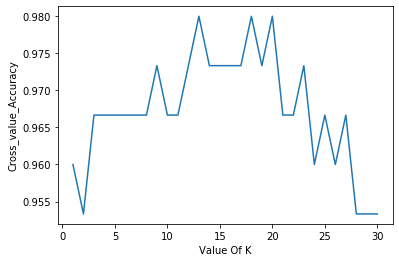

In [18]:
import matplotlib.pyplot as plt
plt.plot(k_range , k_scores)
plt.xlabel('Value Of K')
plt.ylabel('Cross_value_Accuracy') #  k = 13 and k=20 max

# Cross Validation for model selection


In [19]:
# we will compare knn with the best value k =20 and LogisticRegression
knn=KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn , X , y , cv=10 , scoring = 'accuracy').mean())

0.9800000000000001


In [25]:
# Lofgistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print(cross_val_score(logreg , X,y,cv=10 , scoring='accuracy').mean()) # 95 % which is less than knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9533333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

# Cross validation for Feature-Selection

In [26]:
import pandas as pd
data=pd.read_csv('Advertising.csv' , index_col =0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [28]:
feature_col = ['TV' , 'Radio' , 'Newspaper']
X = data[feature_col]
y = data['Sales']
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
scores=cross_val_score(linreg , X , y ,cv=10 , scoring = 'neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [29]:
cancel_the_negative = -scores
print(cancel_the_negative)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [30]:
# Change the MSE to RMSE
import numpy as np
RMSE_change=np.sqrt(cancel_the_negative)
print(RMSE_change)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [31]:
# The mean of RMSE
RMSE_change.mean()

1.6913531708051797

In [37]:
# Now lets check our RMSE averge by removing Newspaper
X = data[['TV' , 'Radio']]
y = data['Sales']
scores=cross_val_score(linreg , X , y , cv=10 ,scoring = 'neg_mean_squared_error')
negative_change = -scores
RMSE_change=np.sqrt(negative_change)
print(RMSE_change.mean()) # it has a very slightly difference(Any ways we will remove it)

1.6796748419090766
